In [433]:
import pandas as pd
import numpy as np
from scratch_net import *
from scratch_net import model
np.random.seed(1)
import matplotlib.pyplot as plt

# Reading Excel file

In [434]:
df=pd.read_excel("dataSet.xlsx")

In [435]:
df.head()

1           1.1           1.2           1.3           1.4  \
0  44688.000000  57779.000000  53565.000000  61394.000000  56920.000000   
1     -5.740679    -55.257567    -43.808065    -52.993126   -120.941165   
2     10.422245     46.662824     18.854267     14.061706     69.469061   
3    -33.915358     43.958494     31.447043     46.660956     45.282869   
4    -41.183628    -22.763986    -78.781950    -78.366908   -108.014839   

            1.5           1.6           1.7           1.8           1.9  \
0  75505.000000  51120.000000  56802.000000  66990.000000  61980.000000   
1   -171.138239    -97.384354    -67.152625   -130.208055    -73.415064   
2     29.502893     14.137144     11.338257     50.467446     24.074710   
3     36.272248     21.264821     17.224021     11.906844     61.503943   
4     36.297370    -25.435931    -35.893435    -32.836649    -93.935588   

       ...               3.90          3.91          3.92          3.93  \
0      ...       38416.000000  50333.000000  52993.000000  47017.000000   
1      ...         -65.066760    -67.085928    -53.092426    -48.396327   
2      ...         -16.734890     24.933620     30.326730    -20.968594   
3      ...           3.607158    -35.331008    -80.447839     20.339595   
4      ...          26.298016      5.090385     25.662896    -17.664913   

           3.94          3.95          3.96          3.97          3.98  \
0  54285.000000  54290.000000  53314.000000  49829.000000  59829.000000   
1    -32.048649    -57.845401    -41.788340      5.421084    -53.063769   
2    -44.497814     34.504292      2.392786     -5.287047     -9.325921   
3     24.434966      2.648436     -8.071782      8.838702     24.370320   
4      6.707516      6.608586    -22.462971     14.485307    -15.169543   

           3.99  
0  48975.000000  
1     26.541787  
2    -10.403674  
3     22.763807  
4      5.476488  

[5 rows x 200 columns]

# Creating Data Set

In [436]:
labels=np.zeros((df.shape[1]))
for i,cols in enumerate(df):
    lab=int(str(cols).split('.')[0])
    if(lab==1):
        labels[i]=1 #label 1 for A class
    else:
        #default label zeros for C class
        continue
Y=labels.reshape(1,-1)
print(Y.shape)

(1, 200)


In [437]:
X=df.values
mu=np.mean(X,axis=1,keepdims=True)
var=np.var(X,axis=1,keepdims=True)
X=(X-mu)/var

print(X.shape)

(392, 200)


In [438]:
totalExample=X.shape[1]

#Shuffling the dataSet to split train/dev/test set
permutation=np.random.permutation(totalExample)
shufX=X[:,permutation]
shufY=Y[:,permutation] #Applying same permutation

X_train=shufX[:,0:120] #Later change
Y_train=shufY[:,0:120]

X_dev=shufX[:,120:160]
Y_dev=shufY[:,120:160]

X_test=shufX[:,160:200]
Y_test=shufY[:,160:200]

print (Y_dev)
print (Y_test)

[[ 1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  0.  1.
   0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.
   0.  1.  0.  0.]]
[[ 0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.
   1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.  0.  0.  0.  1.  0.
   0.  1.  0.  1.]]


# Creating the model

In [439]:
lambd=100
net=model(2,[X.shape[0],20,1],"HE",("relu","sigmoid"),lambd)

In [440]:
net.forward_propagate(X_train,Y_train)

In [441]:
#Z3=net.cache["Z2"]
#A3=net.cache["A2"]
#print (A3[:,:])

In [442]:
print ("cost initial :",net.calculate_cost(Y_train))

cost initial : 5.27162365523


In [443]:
net.back_propagate_model(Y_train)

In [444]:
net.gradient_checking(1e-7,X_train,Y_train)
#difference in grad 2.11521206907e-05

difference in grad 1.46523358626e-08


In [445]:
iteration=500
cost=np.zeros((iteration))
learningRate=0.01
for i in range(iteration):
    net.forward_propagate(X_train,Y_train)
    cost[i]=net.calculate_cost(Y_train)
    net.back_propagate_model(Y_train)
    net.update_parameter(learningRate)

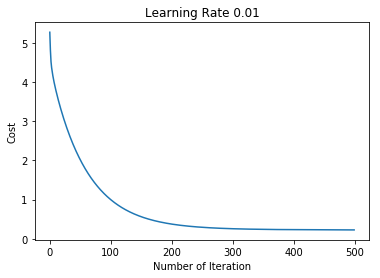

In [446]:
t=np.arange(0,iteration)
plt.plot(t,cost)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.title("Learning Rate "+str(learningRate))
plt.show()

In [447]:
#Calculating train set Error.
net.forward_propagate(X_train,Y_train)
Y_hat=net.cache["A"+str(net.layers)]
prediction=Y_hat>0.5
accuracy=prediction==Y_train

count=0
for i in range(Y_train.shape[1]):
    count=count+accuracy[0,i]
train_accuracy=count/Y_train.shape[1]*100;

In [448]:
#Calcuating Dev set accuracy.
net.forward_propagate(X_dev,Y_dev)
Y_hat=net.cache["A"+str(net.layers)]
prediction=Y_hat>0.5
accuracy=prediction==Y_dev
#print ("Actual Labels: ",Y_dev)
#print ("Prediction   : ",prediction)
#print ("Accuracy     : ",accuracy)
count=0
y_Ptot=0
y_Ptru=0
y_Rtot=0
y_Rtru=0
#Current precision and recall of A. EDIT 1
for i in range(Y_dev.shape[1]):
    count=count+accuracy[0,i]
    if(Y_dev[0,i]==0):#Recall is our normal accuracy
        y_Rtot=y_Rtot+1
        if(prediction[0,i]==0):
            y_Rtru=y_Rtru+1
    if(prediction[0,i]==0):#Precision is out of prefict as C how many are actually c.
        y_Ptot=y_Ptot+1
        if(Y_dev[0,i]==0):
            y_Ptru=y_Ptru+1
            
dev_accuracy=count/Y_dev.shape[1]*100;
recall=y_Rtru/y_Rtot*100
precision=y_Ptru/y_Ptot*100

print ("Dev Accuracy:",dev_accuracy)
print ("recall      :",recall)
print ("precision   :",precision)

Dev Accuracy: 82.5
recall      : 80.95238095238095
precision   : 85.0


In [449]:
print ("Hyperparameter(lambda) : ",lambd)
print ("Training Accuracy : ",train_accuracy)
print ("Development Accuracy:  : ",dev_accuracy)

Hyperparameter(lambda) :  100
Training Accuracy :  100.0
Development Accuracy:  :  82.5
